

# Project: Rate of No-shows across days of week.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction


## The data set I am working with is a collection of appointment information. It gives us the ability to pull many business insights as well as patient insight by providing information on patients age, date of the appointment, and common conditions. It also provides information on those that recieved SMS notifications prior to their appointment as well as if they were a no-show or not. 

## In this exploration we want to see if the day of the week affects the rate of no-show appointments. I will also build on that to see if the number of no-show appointments is consistent accross the week when compared to the total number of appointments scheduled for the day.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
%matplotlib inline

import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
appointments_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Display top 5 rows from data set.
appointments_df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

#### Showing top 5 rows of the csv that was loaded into a pandas dataframe. Allows us to preview the data set and see what our data looks like. 

In [3]:
# View data types of objects in data frame.
appointments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Doing this allows me to see which columns I need to change the data type to make analysis easier when comparing and contrasting.



### Data Cleaning


### The steps I am taking to clean the data involve remove any unessecariy white space, converting columns in the data frame to the correct data type, removing any duplicates/NaN values, as well as removing any abnormalities between the scheduled day and appointment day (example: appointment day occurs before the day the appointment was scheduled). Lastly I am removing any patients whos age shows it is a significant outlier.

#### First we want to strip any leading/trailing whitespace from any columns with a string data type.

In [4]:
# Strip whitespace from subset.
appointments_df['No-show'].str.strip()

# Remove duplicate Appointments.
appointments_df['AppointmentID'].unique()

print(appointments_df)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841190e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598510e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336880e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449830e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639470e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812460e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345360e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542950e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666550e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.113950e+14        5636249      M  2016

### Data set with leading/trailing whitespace removed  on columns within the subset containing the data type of string. Also removed any duplicate appointmentIDs that may exist to account for possible data entry mistakes.

### We want to remove all NaN values from our data set as well as convert the data type of the scheduled day and appointment day to a date type. I am also adding the number value for the day of the week the appointment is on to aid in sorting during the analysis.

### Converting the data type for the dates allows me to make an accurate comparison when finding schedule dates that are after appointment dates. 



In [5]:
# Remove NaN values.
appointments_df.dropna()

# Convert ScheduledDay and AppointmentDay to datetime.
appointments_df['ScheduledDay'] = pd.to_datetime(appointments_df['ScheduledDay'], format="%Y-%m-%d")
appointments_df['AppointmentDay'] = pd.to_datetime(appointments_df['AppointmentDay'], format="%Y-%m-%d")


### When making conversion it is important that I double check the data types to verify the transformations were applied.

In [6]:
# Add day of week columns for ScheduledDay and AppointmentDay. Will be used for ordering and displaying data.
appointments_df['Day_of_Week'] = appointments_df['AppointmentDay'].dt.weekday_name
appointments_df['ScheduledDay_Day_Num'] = appointments_df['ScheduledDay'].dt.dayofweek
appointments_df['AppointmentDay_Day_Num'] = appointments_df['AppointmentDay'].dt.dayofweek
appointments_df['Appointment_Year'] = appointments_df['AppointmentDay'].dt.year

# Display data types for data frame to ensure columns were converted correctly.
appointments_df.info()
appointments_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
PatientId                 110527 non-null float64
AppointmentID             110527 non-null int64
Gender                    110527 non-null object
ScheduledDay              110527 non-null datetime64[ns]
AppointmentDay            110527 non-null datetime64[ns]
Age                       110527 non-null int64
Neighbourhood             110527 non-null object
Scholarship               110527 non-null int64
Hypertension              110527 non-null int64
Diabetes                  110527 non-null int64
Alcoholism                110527 non-null int64
Handcap                   110527 non-null int64
SMS_received              110527 non-null int64
No-show                   110527 non-null object
Day_of_Week               110527 non-null object
ScheduledDay_Day_Num      110527 non-null int64
AppointmentDay_Day_Num    110527 non-null int64
Appointment_Year          110527 non-null int64
d

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589980e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262960e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679510e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841190e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show Day_of_Week  ScheduledDay_Day_Num  \
0        0             0      No      Friday                     4   
1        0             0      No      Friday                     4   
2        0             0      No      Friday                     4   
3        0             0      No      Friday                     4   
4        0             0      No      Friday                     4   

   AppointmentDay_Day_Num  Appointment_Year  
0                       4              2016  
1                       4              2016  
2                       4              2016  
3                       4              2016  
4                       4              2016

### Next I want to remove any outlier values in the data. For example, negative numbers or exceedingly high ages. I also want to ensure that there are no appointment dates that come before the day they were scheduled. This will reduce the chance of outliers affecting the results of the analysis and help to increase the accuracy.

In [7]:
# Get count of total records before and after removing outliers.

print(len(appointments_df.index))

110527


In [8]:
# Delete any rows that have an age less than 0 and older than 100.
indexNames = appointments_df[(appointments_df['Age'] <= 0)].index
appointments_df.drop(indexNames, inplace=True )

indexNames = appointments_df[(appointments_df['Age'] > 100)].index
appointments_df.drop(indexNames, inplace=True )
print(appointments_df)

           PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
0       2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   
1       5.589980e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   
2       4.262960e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   
3       8.679510e+11        5642828      F 2016-04-29 17:29:31     2016-04-29   
4       8.841190e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   
5       9.598510e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   
6       7.336880e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   
7       3.449830e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   
8       5.639470e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   
9       7.812460e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   
10      7.345360e+14        5630213      F 2016-04-27 14:58:11     2016-04-29   
11      7.542950e+12        

In [9]:
# Get count of rows after removing outliers.

print(len(appointments_df.index))

106980


### I use the row counts to compare after I remove records to ensure the transformation took place.

In [10]:
# Eliminate any records where appointment date is before scheduled day.

indexName = appointments_df[(appointments_df['ScheduledDay'] >= appointments_df['AppointmentDay'])].index
appointments_df.drop(indexName, inplace=True )

print(appointments_df)


           PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
5       9.598510e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   
6       7.336880e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   
7       3.449830e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   
9       7.812460e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   
10      7.345360e+14        5630213      F 2016-04-27 14:58:11     2016-04-29   
11      7.542950e+12        5620163      M 2016-04-26 08:44:12     2016-04-29   
12      5.666550e+14        5634718      F 2016-04-28 11:33:51     2016-04-29   
13      9.113950e+14        5636249      M 2016-04-28 14:52:07     2016-04-29   
14      9.988470e+13        5633951      F 2016-04-28 10:06:24     2016-04-29   
15      9.994839e+10        5620206      F 2016-04-26 08:47:27     2016-04-29   
16      8.457440e+13        5633121      M 2016-04-28 08:51:47     2016-04-29   
17      1.479500e+13        

In [11]:
# Verify records were removed by comparing new count to previous.
print(len(appointments_df.index))

69823


 <a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Does The day of the week affect no-shows?

Text(0.5,1,'Appointments')

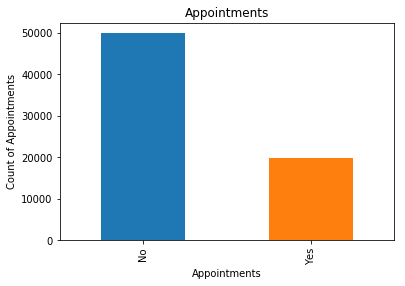

In [28]:
# First we want to see how large of a difference there is between appointments scheduled and the number of no shows. 
# This will give us a rough idea of what we should expect our data to look like at a more granular level.

plot = appointments_df.groupby(['No-show'])['AppointmentID'].count().plot(kind='bar')

plt.xlabel('Appointments')
plt.ylabel('Count of Appointments')
plt.title('Appointments')


## From the above chart we can see how large of a range there is between the total number of no shows when compared to those that did attend their appointment.

## 'No' indicates that the patient did attend their scheduled appointment where 'Yes' indicates they did not. 

([<matplotlib.axis.XTick at 0x7f7b96cac668>,
 <a list of 6 Text xticklabel objects>)

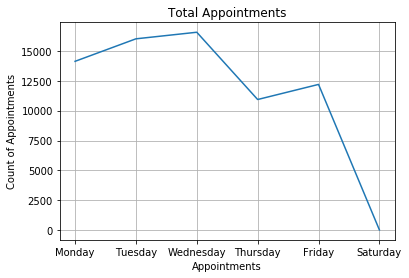

In [31]:

# Compare the number of No-show appointments using side by side bar chart. 
appointments_df.groupby(['AppointmentDay_Day_Num'])['AppointmentID'].count().plot(kind='line')
plt.grid()
# Set labels and display grid lines for line plot.
plt.xlabel('Appointments')
plt.ylabel('Count of Appointments')
plt.title('Total Appointments')
plt.xticks(np.arange(6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))



## Displaying the counts in this format gives us an idea as to how many total appointments happen on each day of the week. We will use this to make a comparison of no-show/show appointments throughout the week as well as each day.

([<matplotlib.axis.XTick at 0x7f7b9a967cf8>,
 <a list of 6 Text xticklabel objects>)

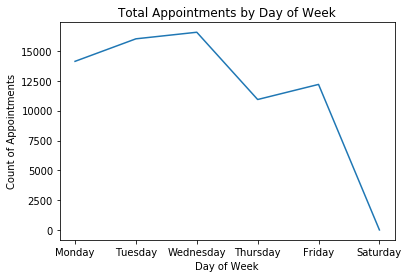

In [14]:
# Get the total number of appointments for each day of the week. 
plt.grid()
appointments_df.groupby(['AppointmentDay_Day_Num'])['AppointmentID'].count().plot(kind='line')

# Set labels and display grid lines for line plot.
plt.xlabel('Day of Week')
plt.ylabel('Count of Appointments')
plt.title('Total Appointments by Day of Week')
plt.xticks(np.arange(6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))

Text(0.5,1,'No Show Appointments')

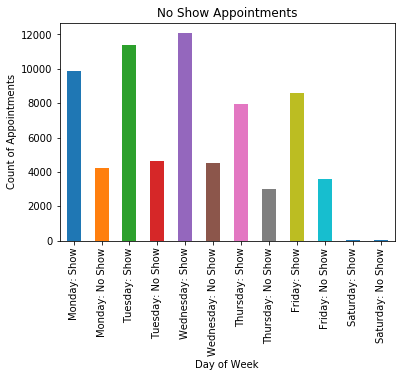

In [15]:
# Plot line graph showing cancelation trend through the days of the week.
plt.grid()
appointments_df.groupby(['AppointmentDay_Day_Num', 'No-show'])['AppointmentID'].count().plot(kind='bar')

# Set labels and display grid lines for line plot.
plt.xlabel('Day of Week')
plt.ylabel('Count of Appointments')
plt.xticks(np.arange(12), ('Monday: Show','Monday: No Show',
                            'Tuesday: Show','Tuesday: No Show',
                            'Wednesday: Show','Wednesday: No Show',
                            'Thursday: Show','Thursday: No Show',
                            'Friday: Show','Friday: No Show',
                            'Saturday: Show','Saturday: No Show'
                           ) 
          )
           
plt.title('No Show Appointments')



### We can see that the number of No-show appointments is significantly less than those who make their appointment.

### Looking at this graph we can see that the amount of no-shows accross the week stays fairly consistent. dispite the number of total appointments scheduled. This tells us that as the week progresses, the daily rate of no-show increases as the week goes on.

<a id='conclusions'></a>
## Conclusions

### Looking at the data we can see that throughout the week dispite the overall daily appointments scheduled, the amount of no-shows remains fairly constant.

### We can also conclude that as the week progresses the number of no shows as compared to total appointments increases.

### The data presented in this exploration is limited due to the accuracy of the logging of the data. It cannot account for appointments that may have been mis-flagged as a show/no-show. 

### In the cleaning steps, selecting the unique records could possibly result in lost data if a patient had multiple appointments on the same day.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])